In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
class Projector:
    
    def __init__(self, n_nodes, func=None, rotate_axis=0, radius=1, complete_circ=True, fig=None):
        self.n = n_nodes
        if func is None:
            func = lambda x: x
        else:
            self.func = func
        self.rotate_axis = np.pi * rotate_axis / 2
        self.radius = radius
        self.degs = 2 * np.pi / n_nodes
        self.complete_circ=complete_circ
        if fig is None:
            self.fig = plt
        else:
            self.fig = fig
    
    def convert_cart(self, n):
        rads = self.degs * n
        return -self.radius*np.cos(rads+self.rotate_axis), self.radius*np.sin(rads+self.rotate_axis)
    
    @property
    def pair_map(self):
        return {i: self.func(i) % self.n for i in range(self.n)}
    
    @property
    def _map_map(self):
        return {i: self.convert_cart(self.func(i) % self.n) for i in range(self.n)}
    
    @property
    def _base_map(self):
        return {i: self.convert_cart(i) for i in range(self.n)}
    
    @property
    def _base_lists(self):
        x_list, y_list = zip(*[self.convert_cart(i) for i in range(self.n)])
        if not self.complete_circ:
            return list(x_list) + [x_list[0]], list(y_list) + [y_list[0]]
        else: return list(x_list), list(y_list)
    
    
    def outline(self, plot=False, **plot_params):
        x_list, y_list = self._base_lists
        if plot:
            self.fig.plot(x_list, y_list, **plot_params)
        return x_list, y_list
    
    def inside(self, fig=None, **plot_params):
        base = self._base_map
        mapped = self._map_map
        for i in range(self.n):
            x_0, y_0 = base[i]
            x_1, y_1 = mapped[i]
            x = [x_0, x_1]
            y = [y_0, y_1]
            self.fig.plot(x, y, **plot_params)
        return self.fig

In [3]:
x_out, y_out = Projector(100).outline()

phoenix.


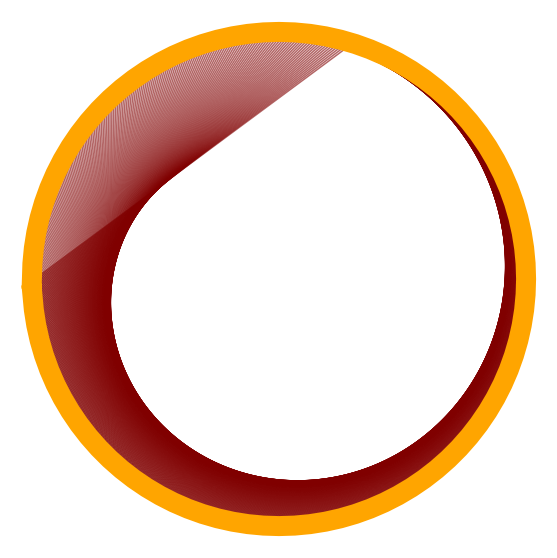

In [4]:
print('phoenix.')
plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal', adjustable='box')
plt.axis("off")

Projector(750, lambda x: 1.3*x).inside(color="maroon", alpha=0.6)
plt.plot(x_out, y_out, color="orange", linewidth=20);

fall.


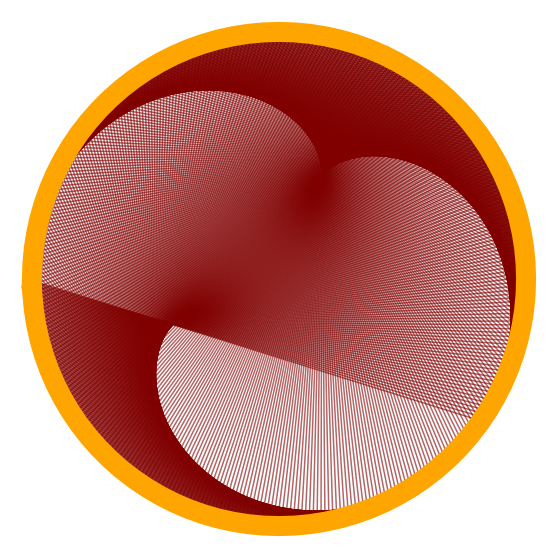

In [5]:
print('fall.')
plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal', adjustable='box')
plt.axis("off")

Projector(1000, lambda x: 2.6*x).inside(color="maroon", alpha=0.6)
plt.plot(x_out, y_out, color="orange", linewidth=20)
plt.savefig("art/autumn.png");

convergence.


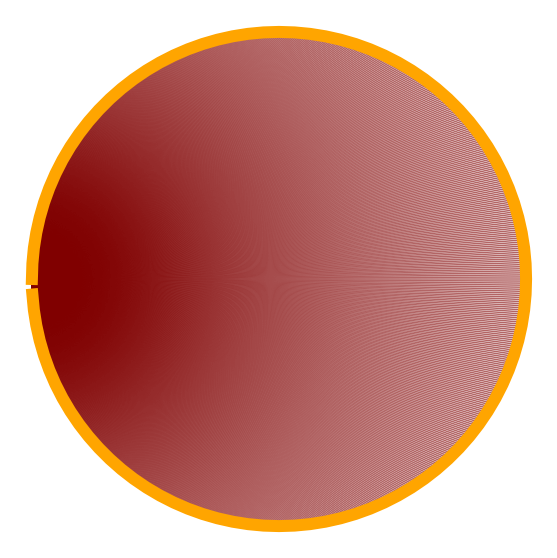

In [6]:
print('convergence.')
plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal', adjustable='box')
plt.axis("off")

Projector(750, lambda x: 0).inside(color="maroon", alpha=0.6)
plt.plot(x_out, y_out, color="orange", linewidth=12);

luck.


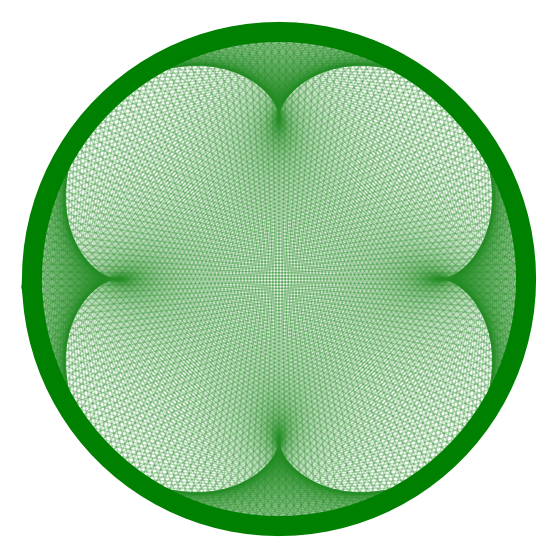

In [7]:
print('luck.')
plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal', adjustable='box')
plt.axis("off")

Projector(1000, lambda x: 5*x, rotate_axis=0.5).inside(color="forestgreen", alpha=0.3)
plt.plot(x_out, y_out, color="green", linewidth=20)
plt.savefig("art/luck.png");

spring.


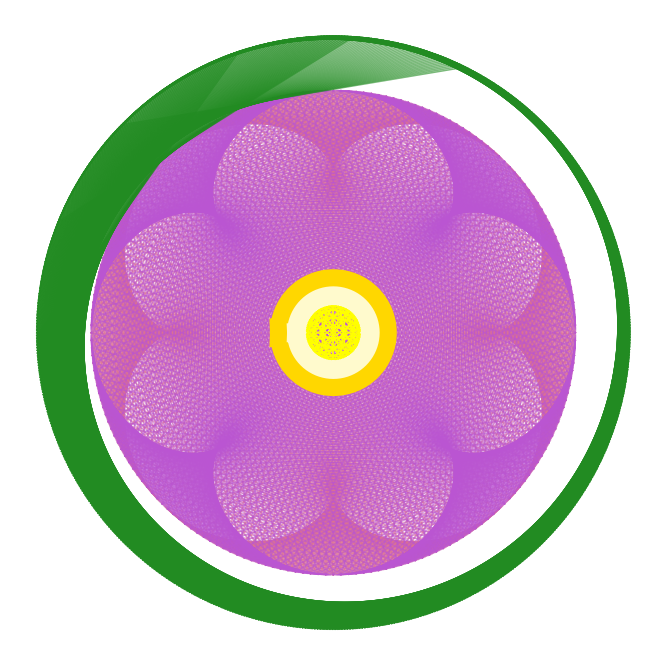

In [8]:
print('spring.')
plt.figure(figsize=(12,12))
plt.gca().set_aspect('equal', adjustable='box')
plt.axis("off")

x_inner, y_inner = Projector(800, radius=0.2).outline()
x_inner_inner, y_inner_inner = Projector(800, radius=0.15).outline()
Projector(1000, lambda x: 5*x, rotate_axis=0.5).inside(color="palevioletred", alpha=0.5)
Projector(1000, lambda x: 5*x, rotate_axis=0).inside(color="mediumorchid", alpha=0.5)
Projector(750, lambda x: 1.2*x, radius=1.225).inside(color="forestgreen", alpha=0.6)
Projector(750, lambda x: 1.2*x, radius=1.225, rotate_axis=0.25).inside(color="forestgreen", alpha=0.6)
Projector(750, lambda x: 1.2*x, radius=1.225, rotate_axis=0.5).inside(color="forestgreen", alpha=0.6)
plt.plot(x_inner, y_inner, color="gold", linewidth=30, alpha=1)
plt.plot(x_inner_inner, y_inner_inner, color="lemonchiffon", linewidth=20, alpha=1)
Projector(100, lambda x: 23*x, radius=0.11).inside(color="yellow")
plt.savefig("art/spring.png");

life.


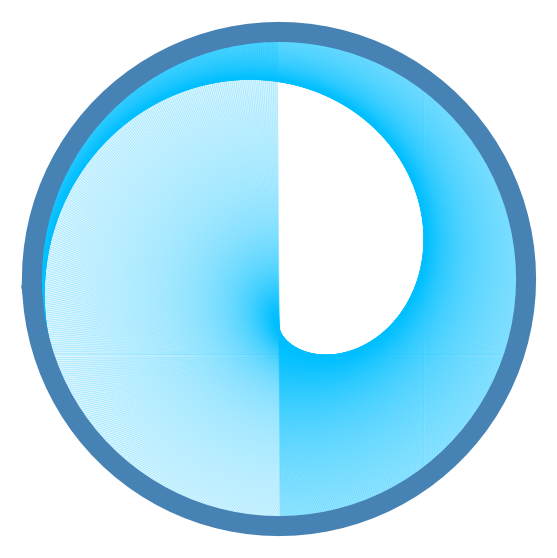

In [9]:
print('life.')
plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal', adjustable='box')
plt.axis("off")

Projector(1000, lambda x: 1.5*x, rotate_axis=-1).inside(color="deepskyblue", alpha=0.3)
plt.plot(x_out, y_out, color="steelblue", linewidth=20)
plt.savefig("art/life.png");

love.


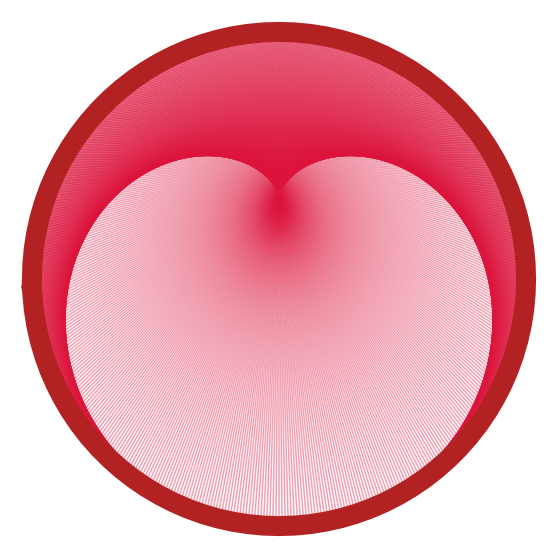

In [10]:
print('love.')
plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal', adjustable='box')
plt.axis("off")

Projector(1000, lambda x: 2*x, rotate_axis=-1).inside(color="crimson", alpha=0.4)
plt.plot(x_out, y_out, color="firebrick", linewidth=20)
plt.savefig("art/love.png");

chaos.


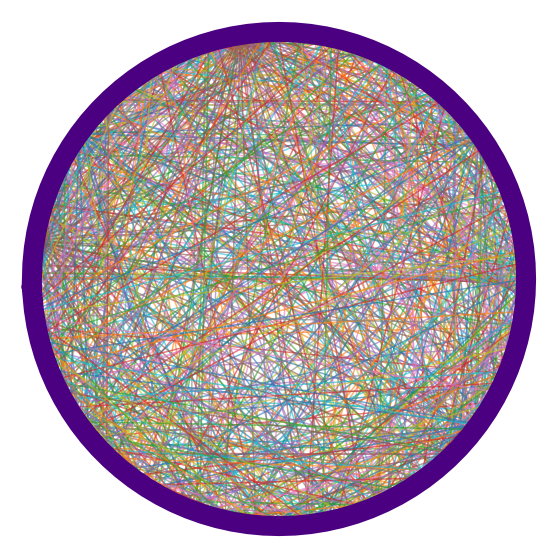

In [11]:
print('chaos.')
plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal', adjustable='box')
plt.axis("off")

Projector(1000, lambda x: x**2).inside(alpha=0.6)
plt.plot(x_out, y_out, color="indigo", linewidth=20)
plt.savefig("art/chaos.png");

but, ordered.


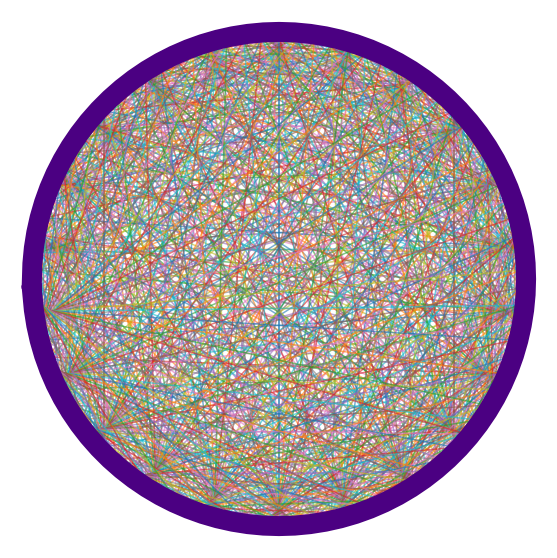

In [12]:
print('but, ordered.')
plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal', adjustable='box')
plt.axis("off")

Projector(1000, lambda x: 23*x).inside(alpha=0.6)
plt.plot(x_out, y_out, color="indigo", linewidth=20)
plt.savefig("art/butordered.png");